# Convolutional Neural Network
This Convolutional Neural Network (CNN) model is inspired by the classic LeNet-5 architecture. It is designed for image classification tasks and consists of convolutional, subsampling (pooling), and fully connected layers.
## Model Architecture

1. **C1 Convolutional Layer**
   - Filters: 6
   - Kernel Size: (5, 5)
   - Strides: (1, 1)
   - Activation: Tanh
   - Input Shape: (28, 28, 1) (grayscale images of size 28x28)

2. **S2 Subsampling (Pooling) Layer**
   - Pool Size: (2, 2)
   - Strides: (2, 2)
   - Type: Average Pooling

3. **C3 Convolutional Layer**
   - Filters: 6
   - Kernel Size: (5, 5)
   - Strides: (1, 1)
   - Activation: Tanh

4. **S4 Subsampling (Pooling) Layer**
   - Pool Size: (2, 2)
   - Strides: (2, 2)
   - Type: Average Pooling

5. **Flatten Layer**
   - Converts the 2D matrix into a 1D vector to connect with the fully connected layers.

6. **C5 Fully Connected Layer**
   - Units: 120
   - Activation: Tanh

7. **FC6 Fully Connected Layer**
   - Units: 84
   - Activation: Tanh

8. **Output Layer**
   - Units: 37 (corresponding to the number of classes)
   - Activation: Softmax

LeNet-5 is one of the pioneering architectures in the field of convolutional neural networks (CNNs), developed by Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner in 1998. It was designed primarily for handwritten digit recognition, specifically for the MNIST dataset. The architecture laid the groundwork for many modern CNNs and introduced several key concepts that are widely used today.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.datasets import mnist

# Data Preparation

In [4]:
from load_emnist_mnist import load_emnist_mnist
from load_emnist_mnist import load_emnist_letters

X_train, X_test, y_train, y_test = load_emnist_mnist("emnist_mnist")

In [5]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
from keras_tuner import RandomSearch
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.src.optimizers import SGD

# Building model

In [10]:
model = Sequential()

# C1 Convolution Layer
model.add(Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh', input_shape=(28,28,1)))

# S2 SubSampling Layer
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

# C3 Convolution Layer
model.add(Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh'))

# S4 SubSampling Layer
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

# C5 Fully Connected Layer
model.add(Dense(units=120, activation='tanh'))

# Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
model.add(Flatten())

# FC6 Fully Connected Layers
model.add(Dense(units=84, activation='tanh'))

# Output Layer
model.add(Dense(units=10, activation='softmax'))

# Compile the Model
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1, momentum=0.0, decay=0.0), metrics=['accuracy'])


In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 6)        │           906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 4, 4, 6)        │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4, 4, 120)      │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │       161,364 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,116 (641.08 KB)

 Trainable params: 164,116 (641.08 KB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [12]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.8543 - loss: 0.5437 - val_accuracy: 0.9627 - val_loss: 0.1305
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9665 - loss: 0.1187 - val_accuracy: 0.9738 - val_loss: 0.0877
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9750 - loss: 0.0833 - val_accuracy: 0.9799 - val_loss: 0.0681
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9803 - loss: 0.0684 - val_accuracy: 0.9821 - val_loss: 0.0604
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9829 - loss: 0.0591 - val_accuracy: 0.9825 - val_loss: 0.0557
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9839 - loss: 0.0550 - val_accuracy: 0.9852 - val_loss: 0.0485
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9848 - loss: 0.0506 - val_accuracy: 0.9846 - val_loss: 0.0510
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9860 - loss: 0.0474 - 

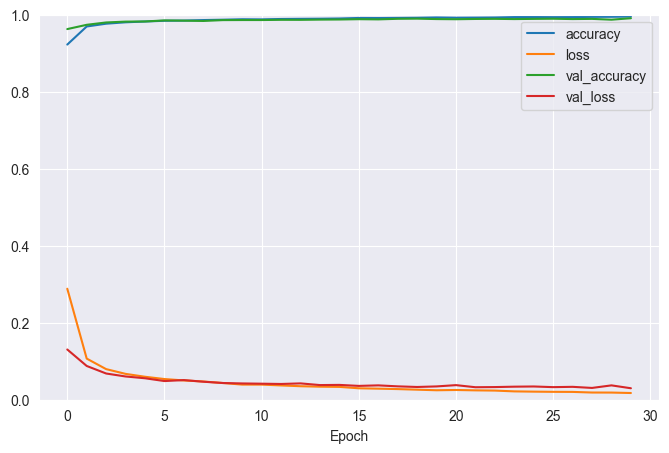

In [13]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel('Epoch')
plt.ylim([0,1])
plt.show()

# Model evaluation

In [14]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9895 - loss: 0.0360


[0.02978314273059368, 0.9908999800682068]

In [15]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [16]:
def print_characters(X, y_pred, y_test, n_rows=4, n_cols=10):
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(X[index].reshape(28,28), cmap="binary", interpolation="nearest")
            plt.axis('off')
            if y_pred[index] >= 10:
                plt.title(chr(y_pred[index] - 11 + 97), color='black' if y_pred[index] == y_test[index] else 'red')
            else:
                plt.title(y_pred[index], color='black' if y_pred[index] == y_test[index] else 'red')
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

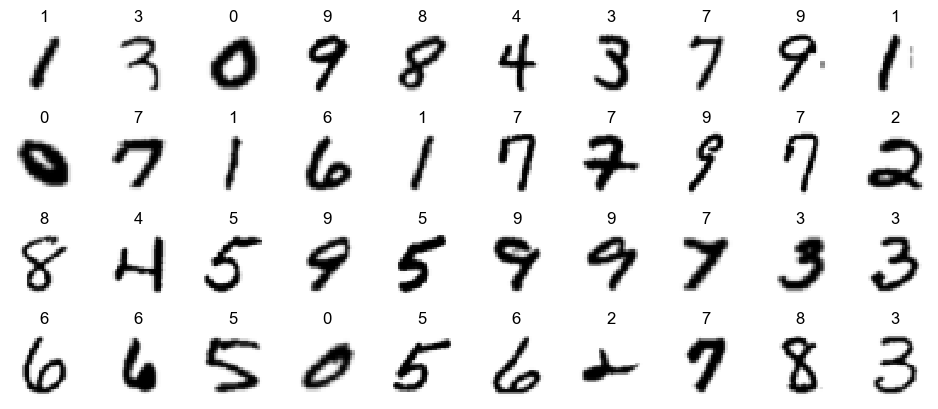

In [17]:
indexes = np.random.randint(0, X_test.shape[0], 4*10)
print_characters(X_test[indexes], y_pred[indexes], y_test[indexes])

from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test, y_pred)

0.9909

# Accuracy 0.99

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1000
           1       0.99      0.99      0.99      1000
           2       0.99      0.99      0.99      1000
           3       0.99      0.99      0.99      1000
           4       0.99      0.99      0.99      1000
           5       0.99      0.99      0.99      1000
           6       1.00      0.99      1.00      1000
           7       0.99      0.99      0.99      1000
           8       0.99      0.98      0.99      1000
           9       0.99      0.99      0.99      1000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


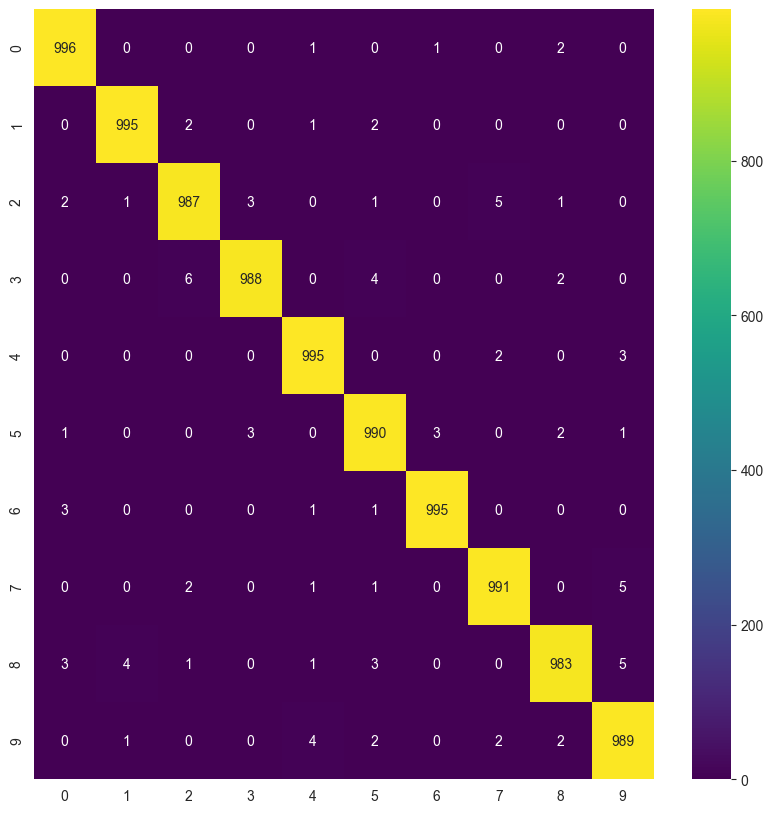

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.show()


In [21]:
model.save('cnn_mnist_lenet5.keras')